<h2 style = "color: chocolate"> Best Subset Selection, Ridge and Lassso regression</h2>

Ayudante: Diego Bernal Soto

Conocemos que el modelo lineal estándar viene dado por la siguiente ecuación abajo:

$$
\begin{align}
Y = \beta_0 + \beta_1X_1 + \dots + \beta_kX_p + u
\end{align}
$$

Planteando nuestra función de costos como lasuma de los errores al cuadrado de la siguiente forma:

$$
\begin{align}
SSE = \sum_{i=1}^n (y_i - \hat{y_i})^2
\end{align}
$$

Al minimizar la función de costos obtenemos los coeficientes estimados por MCO (OLS), los que son insesgados bajo los siguientes supuestos:

- Linealidad de los parámetros.
- Muestra aleatoria
- Condición de identificación (Matriz invertible $X^TX$ osea que no haya multicolinealidad perfecta $X_2$ = $\frac{X_2}{4}$)
- Ortogonalidad ($E(u|X) = 0$)

$$
\begin{aligned}
\hat{\beta} &= (X^TX)^{-1}X^Ty \quad \\
&= (X^TX)^{-1}X^T (X\beta + u)\\
&= \beta + (X^TX)^{-1}X^Tu \\
E(\hat{\beta}|X) &= \beta + (X^TX)^{-1}X^TE(u|x) \\
&= \beta
\end{aligned}
$$

A su vez el resultado del modelo tiene la menor varianza, 





<a href = "https://xavierbourretsicotte.github.io/subset_selection.html">Fuentes</a>

In [94]:
import itertools
import ipywidgets
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
import pandas as pd
import numpy as np
from fiona.drvsupport import supported_drivers
import googlemaps
from datetime import datetime
import ee
import geemap
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot
from shapely.geometry import shape
import rasterio.features
from sklearn.preprocessing import StandardScaler
import os
import elevation
import rioxarray as riox
from rasterio.plot import show
from shapely.geometry import Polygon
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.linear_model import RidgeCV

In [101]:
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

In [4]:
gdf = gpd.read_file('./data/Modelos.shp')

In [5]:
gdf = gdf.drop(columns=["distanci_1", "universida","calles","class_name","EDAD_6A14","EDAD_0A5"])

In [6]:
gdf['porcion_h'] = gdf['HOMBRES'] / (gdf['HOMBRES']+gdf['MUJERES'])
gdf['porcion_edad_15_64'] = gdf['EDAD_15A64'] /gdf['PERSONAS']
gdf['porcion_edad_65'] = gdf['EDAD_65YMA'] /gdf['PERSONAS']
gdf['porcion_inmigrantes'] = gdf['INMIGRANTE'] /gdf['PERSONAS']

In [7]:
gdf = gdf.drop(columns=["MUJERES","HOMBRES","PERSONAS","EDAD_15A64","EDAD_65YMA","INMIGRANTE"])

In [8]:
#Cambio de nombre por perdida en cambios 
rename = {
    'distancia_': 'distancia_vegetacion',
    'distanci_2': 'distancia_calles',
    'distanci_3': 'distancia_universidad',
    'distanci_4': 'distancia_comercio',
    'distanci_5': 'distancia_bencineras',
    'distanci_6': 'distancia_zonas_recrea',
    'distanci_7': 'distancia_hospitales',
    'distanci_8': 'distancia_oficinas',
    'distanci_9': 'distancia_escuelas',
    'distanci10': 'distancia_metro',
    'distanci11': 'distancia_muni',
    'distanci12': 'distancia_parking',
    'calles_0': 'vegetation',
    'calles_1': 'roads',
    'calles_2': 'universities',
    'calles_3': 'commerce',
    'calles_4': 'gas_stations',
    'calles_5': 'recreational_area',
    'calles_7': 'hospitals',
    'calles_8': 'offices'

}

In [9]:
gdf = gdf.rename(columns=rename)

In [10]:
gdf = gdf.dropna()

In [11]:
df_ = gdf.copy()

In [12]:
gdf = gdf.drop(columns=['geometry'])

In [13]:
gdf.describe().T

,count,mean,std,min,25%,50%,75%,max
distancia_vegetacion,57459.0,1.373988e+03,688.751266,0.000000e+00,8.861508e+02,1.345783e+03,1.843075e+03,4.106326e+03
distancia_calles,57459.0,3.506742e+03,2290.266495,0.000000e+00,1.674317e+03,2.972759e+03,5.281058e+03,9.143533e+03
distancia_universidad,57459.0,1.125716e+03,575.011592,0.000000e+00,6.996939e+02,1.107156e+03,1.498089e+03,2.878232e+03
distancia_comercio,57459.0,9.782919e+02,650.177250,0.000000e+00,4.999343e+02,8.193787e+02,1.308895e+03,3.598205e+03
distancia_bencineras,57459.0,1.113561e+03,769.338747,0.000000e+00,5.118552e+02,1.018082e+03,1.613407e+03,4.005548e+03
distancia_zonas_recrea,57459.0,1.517318e+03,1126.799103,0.000000e+00,6.926697e+02,1.167359e+03,2.119721e+03,5.251177e+03
distancia_hospitales,57459.0,2.827661e+03,2036.269427,0.000000e+00,9.956747e+02,2.574156e+03,4.347753e+03,8.864239e+03
distancia_oficinas,57459.0,3.833855e+02,286.330240,0.000000e+00,1.764540e+02,3.079944e+02,5.231266e+02,1.898320e+03
distancia_escuelas,57459.0,2.192777e+03,1584.975892,0.000000e+00,9.209603e+02,1.802528e+03,3.171826e+03,7.779007e+03
distancia_metro,57459.0,2.096536e+03,1474.474606,0.000000e+00,9.529412e+02,1.733695e+03,2.947056e+03,7.496635e+03


In [14]:
corr_17 = gdf.corr()

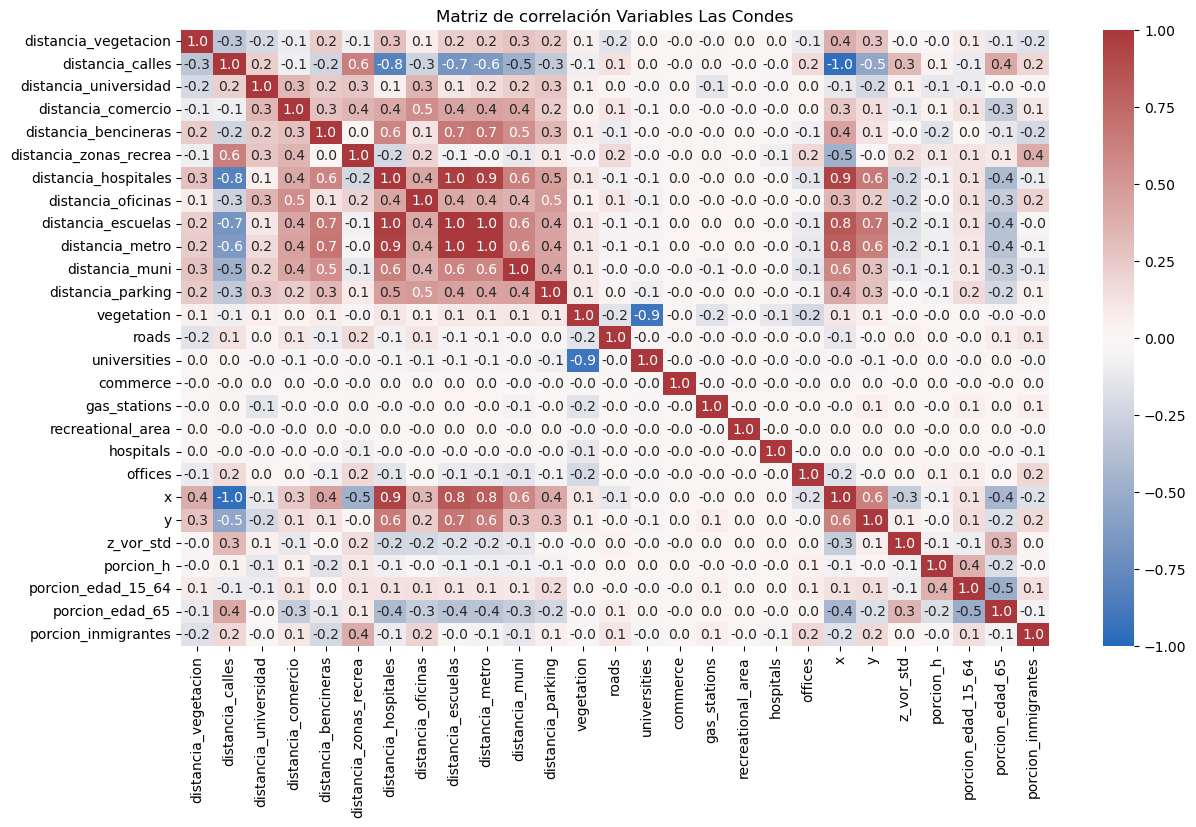

In [15]:
plt.figure(figsize=(14, 8))
ax = sns.heatmap(corr_17, annot=True, cmap='vlag', vmin=-1, vmax=1, fmt='.1f')

plt.title('Matriz de correlación Variables Las Condes')

plt.show()

<p>Estandarizamos nuestras variables para ver el comportamiento de nuestros datos con una reducción de dimensionaliad</p>

In [16]:
scaler = preprocessing.StandardScaler()#Estandarizar por media y dividido en devest
df= scaler.fit_transform(gdf) #omitiendo el calsificador

In [17]:
from pca import generate_n_dimensions, calculate_pca

In [18]:
pca_manual, u_d,pve = calculate_pca(df,n_components=2)

In [19]:
X_origin = np.zeros(len(u_d))
Y_origin = np.zeros(len(u_d))

U = u_d[:, 0]
V = u_d[:, 1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


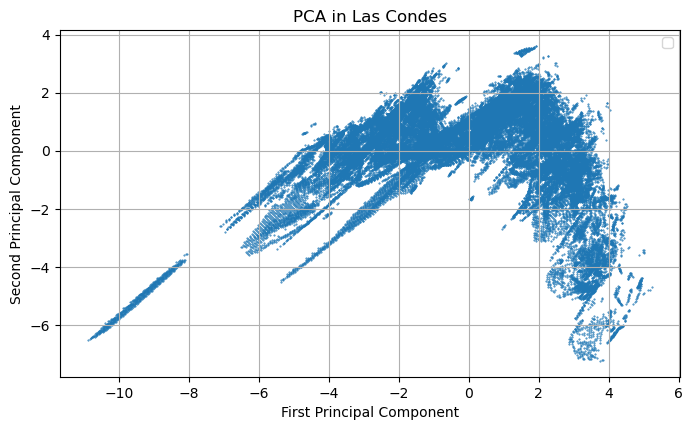

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))
ax.scatter(pca_manual[:,0], pca_manual[:,1],s=0.2)
# for i in range(len(columns)):
#     ax.quiver(X_origin[i], Y_origin[i], U[i], V[i], color=colors[i], angles='xy', scale_units='xy', scale=0.5,label = columns[i])
ax.grid(True)
ax.set_title("PCA in Las Condes")
ax.set_xlabel("First Principal Component"); ax.set_ylabel("Second Principal Component")
ax.legend()
plt.show()

In [21]:
pve_list = []
components = df.shape[1]
for k in range(1,components):
    _,_,pve = calculate_pca(df,k)
    pve_list.append(np.sum(pve))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


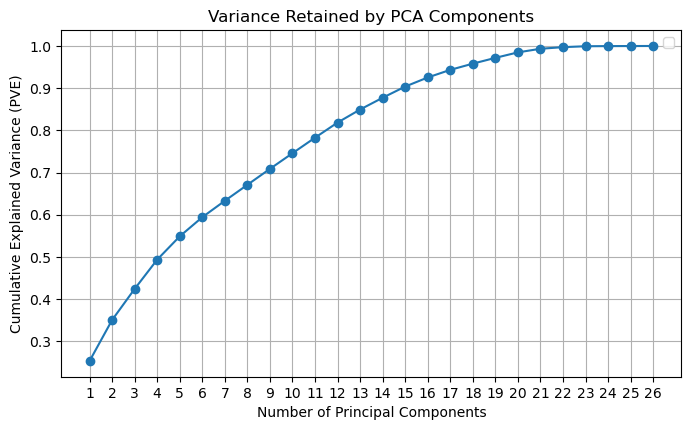

In [22]:
fig, ax =plt.subplots(1,1,figsize = (8,4.5))
x_vals = np.arange(1, len(pve_list) + 1)
ax.plot(x_vals, pve_list, marker='o')

ax.set_xticks(x_vals)  # Force integer ticks on x-axis
ax.set_title('Variance Retained by PCA Components')
ax.set_xlabel('Number of Principal Components');ax.set_ylabel('Cumulative Explained Variance (PVE)')
ax.grid(True)
ax.legend()
plt.show()

In [23]:
from pca import expected_pve

In [24]:
pca_17 = PCA(n_components=23)
pca_17.fit(df)

PCA(n_components=23)

In [25]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

min_var(0.95,pca_17.explained_variance_ratio_)

18

In [26]:
pca_17 = PCA(n_components=18)
pca_result=pca_17.fit_transform(df)

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)

In [28]:
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(pca_result)

c:\Users\Diego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


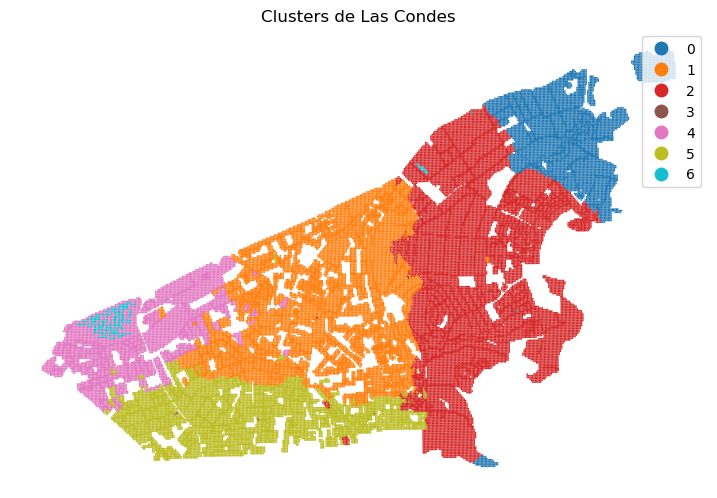

In [29]:
df_["k5cls"] = k5cls.labels_
f, ax = plt.subplots(1, figsize=(9, 9))

df_.plot(
    column="k5cls", categorical=True, legend=True, linewidth=0, ax=ax
)

ax.set_axis_off()
ax.set_title("Clusters de Las Condes")
plt.show()

<p>Agregamos como feature esta zonificación a nuestro data set inicial y ahora empezamos a correr los modelos despues de nuestro Analisis exploratorio</p>

In [30]:
df_['k5cls'].unique()

array([0, 2, 5, 3, 4, 1, 6])

In [31]:
df_['k5cls'].value_counts()

k5cls
2    19501
1    15763
5     9354
0     6248
4     6223
6      338
3       32
Name: count, dtype: int64

<p>Preprocesamiento</p>

In [32]:
df_ = pd.get_dummies(df_,columns=['k5cls'],prefix='k5cls', drop_first=True)

In [33]:
for col in df_.columns:
    if df_[col].dtype == 'bool':
        df_[col] = df_[col].astype(int) 

In [34]:
clase = k5cls.labels_

In [35]:
Y = df_['z_vor_std'].values

In [36]:
gdf =df_.copy()

In [37]:
df_ = df_.drop(columns=['geometry','z_vor_std'])

In [38]:
X = df_.values

In [39]:
X

array([[1300.12080021, 3132.76054011, 2677.54325075, ...,    0.        ,
           0.        ,    0.        ],
       [1324.759231  , 3124.3576777 , 2695.29477915, ...,    0.        ,
           0.        ,    0.        ],
       [1349.4131026 , 3116.13371553, 2713.16162851, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [4084.22259023, 3404.95589782, 2302.86883165, ...,    0.        ,
           0.        ,    0.        ],
       [4095.21247727, 3418.27737624, 2326.48491192, ...,    0.        ,
           0.        ,    0.        ],
       [4106.3260372 , 3431.73033614, 2350.13123713, ...,    0.        ,
           0.        ,    0.        ]])

In [40]:
X.shape

(57459, 32)

<p>Data Set desbalanceado tendremos que aplicar un muestreo aleatorio estratificado por clase para proba los modelos</p>

In [41]:
from models import ols,stratified_sampling, rss, r_squared
from sklearn.model_selection import StratifiedKFold

In [42]:
X_train,Y_train,X_test,Y_test = stratified_sampling(X,Y,clase,0.8)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=77)
rss_list = [];r2_list = []
y_val_list = []; y_pred_list = []
fold_id = []

In [43]:
for fold, (train_idx,val_idx) in enumerate(skf.split(X_train, clase[:len(X_train)])):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    Y_tr, Y_val = Y_train[train_idx], Y_train[val_idx]

    betas, _ = ols(X_tr, Y_tr)
    if not np.all(X_val[:, 0] == 1):
        X_val = np.column_stack((np.ones(X_val.shape[0]), X_val))
    
    Y_val_pred = X_val @ betas
    

    rss_fold = rss(Y_val, Y_val_pred)
    r2_fold = r_squared(Y_val, Y_val_pred)

    rss_list.append(rss_fold)
    r2_list.append(r2_fold)
    y_val_list.extend(Y_val)
    y_pred_list.extend(Y_val_pred)
    fold_id.extend([fold]*len(Y_val))

In [44]:
y_val_list = np.array(y_val_list)
y_pred_list = np.array(y_pred_list)
fold_id = np.array(fold_id)
y_pred_list.shape

(45966,)

In [45]:
y_pred_list.shape

(45966,)

In [46]:
resultados = {
        'RSS_mean': round(np.mean(rss_list),1),
        'RSS_std': round(np.std(rss_list),1),
        'R2_mean': round(np.mean(r2_list),1),
        'R2_std': round(np.std(r2_list),2),
    }

In [47]:
df_res = pd.DataFrame([resultados])

In [48]:
df_res

,RSS_mean,RSS_std,R2_mean,R2_std
0,377543.8,10838.3,0.3,0.01


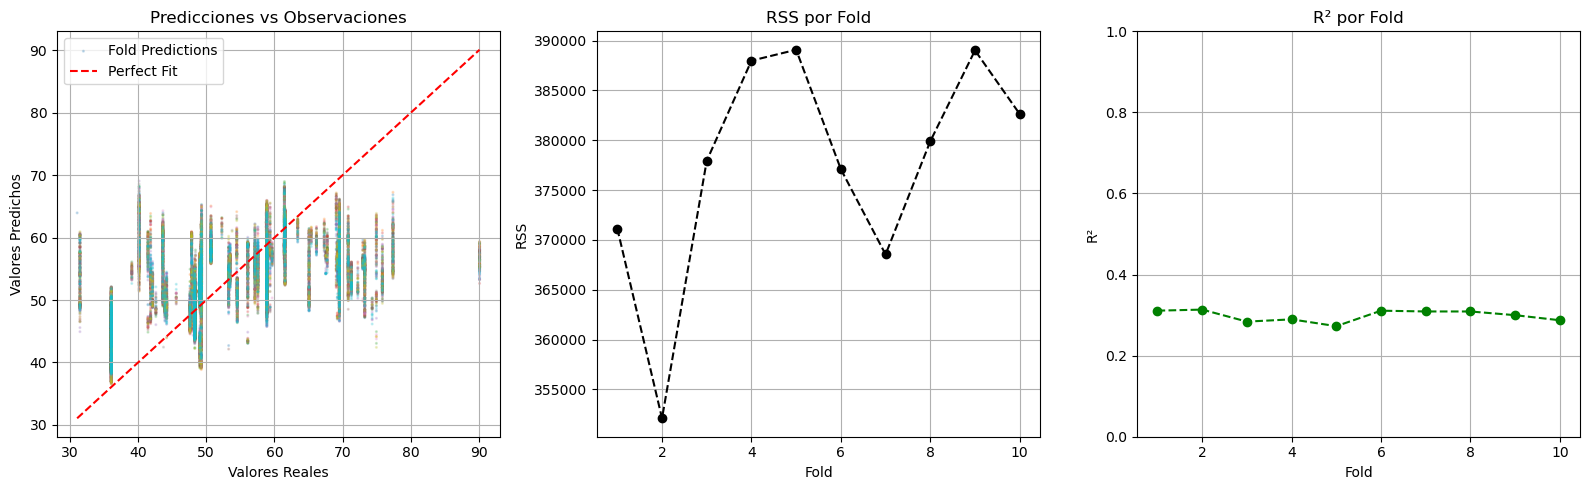

In [49]:
fig,ax = plt.subplots(1,3,figsize=(16,5))

ax[0].scatter(y_val_list, y_pred_list,c=fold_id, cmap='tab10',alpha=0.2, label='Fold Predictions',s = 1.5)
ax[0].plot([y_val_list.min(), y_val_list.max()],[y_val_list.min(), y_val_list.max()],'r--', label='Perfect Fit')
ax[0].set_xlabel('Valores Reales')
ax[0].set_ylabel('Valores Predichos')
ax[0].set_title('Predicciones vs Observaciones')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(range(1, len(rss_list) + 1), rss_list, marker='o', linestyle='--', color='black')
ax[1].set_xlabel('Fold')
ax[1].set_ylabel('RSS')
ax[1].set_title('RSS por Fold')
ax[1].grid(True)

ax[2].plot(range(1, len(r2_list) + 1), r2_list, marker='o', linestyle='--', color='green')
ax[2].set_xlabel('Fold')
ax[2].set_ylabel('R²')
ax[2].set_ylim(0, 1) 
ax[2].set_title('R² por Fold')
ax[2].grid(True)

plt.tight_layout()
plt.show()


Algoritmo Best subset Selection

1. Sea $M_0$ denotamos el modelo nulo, que no contiene predictores. Este modelo simplemente predice la media de la muestra pra cada observación.

2. For $k = 1,2, \dots p$:

    2.1. Ajusta todos los $(\frac{p}{k})$ modelos que contienen exactamente $k$ predictores.
 
    2.2. Selecciona el mejor entre todos los  $(\frac{p}{k})$, y llamalos $M_k$. Aca el mejor es definido como el que tiene el menor $RSS$ o equivalentemente el $R^2$ mas grande.
3. Selecciona el mejor modelo entre $M_0, \dots, M_p$ usando el error de la predicción o del set de validación, $C_p$ ,$(AIC)$, $BIC$ o el $R^{2}_{ajusted}$ o Usando $CV$.

Cuantas combinaciones posibles tendriamos para este modelo 
$$
\sum_{k=1}^{32} \binom{32}{k} = 2^{32} - 1 = 4,294,967,295 \text{ combinaciones}
$$

Tiempo de calculo computacional requerido uff!

In [50]:
from models import sub_set_selection

In [51]:
#resultados_best = sub_set_selection(X,Y)

Algoritmo Forward Stepwise Selection

1. Sea $M_0$ denotamos el modelo nulo, que no contiene ningun predictor.

2. Para $k = 0, \dots, p-1$:

    2.1. Considerar todos los modelos $(p-k)$ que agregan un predictor adicional a los que ya estan en $M_k$
    2.2. Seleccionar el mejor entre los $(p-k)$ modelos, y llamarlo $M_{k+1}$.Aca el mejor es definido como el que tiene el menor $RSS$ o equivalentemente el $R^2$ mas grande.
3. Selecciona el mejor modelo entre $M_0, \dots, M_p$ usando el error de la predicción o del set de validación, $C_p$ ,$(AIC)$, $BIC$ o el $R^{2}_{ajusted}$ o Usando $CV$.


Combinaciones para forward 

$$
\sum_{k=1}^{32} (n - k + 1) = 32 + 31 + 30 + \dots + 1 = \frac{32(32 + 1)}{2} = 528 \text{ modelos}
$$

In [52]:
from models import forward_selection

In [53]:
resultados_forward = forward_selection(X,Y)

In [54]:
num_var = resultados_forward['num_variables']
rss_val = resultados_forward['RSS']
r_sqr = resultados_forward['R_squared']
variables = resultados_forward['variables']

In [55]:
df_for = pd.DataFrame({
    'numb_features': num_var,
    'RSS': rss_val,
    'R_squared': r_sqr
})
df_for['min_RSS'] = df_for['RSS'].cummin()
df_for['max_R_squared'] = df_for['R_squared'].cummax()


In [56]:
print(f"{'N° var':<3} | {'Variables (índices)':<95} | {'RSS':<10} | {'R²':<10}")
for i in np.argsort(rss_val)[:7]:
    n = num_var[i]
    f = variables[i]
    r = round(rss_val[i])
    r_2 = round(r_sqr[i],3)
    print(f"{n:<6} | {str(f):<40} | {r:<10} | {r_2:<10}")

N° var | Variables (índices)                                                                             | RSS        | R²        
27     | [24, 1, 11, 7, 30, 6, 5, 0, 4, 9, 26, 3, 10, 22, 23, 27, 2, 29, 8, 13, 17, 25, 14, 19, 16, 18, 12] | 4484740    | 0.334     
30     | [24, 1, 11, 7, 30, 6, 5, 0, 4, 9, 26, 3, 10, 22, 23, 27, 2, 29, 8, 13, 17, 25, 14, 19, 16, 18, 12, 15, 31, 28] | 4484740    | 0.334     
28     | [24, 1, 11, 7, 30, 6, 5, 0, 4, 9, 26, 3, 10, 22, 23, 27, 2, 29, 8, 13, 17, 25, 14, 19, 16, 18, 12, 15] | 4484740    | 0.334     
29     | [24, 1, 11, 7, 30, 6, 5, 0, 4, 9, 26, 3, 10, 22, 23, 27, 2, 29, 8, 13, 17, 25, 14, 19, 16, 18, 12, 15, 31] | 4484740    | 0.334     
26     | [24, 1, 11, 7, 30, 6, 5, 0, 4, 9, 26, 3, 10, 22, 23, 27, 2, 29, 8, 13, 17, 25, 14, 19, 16, 18] | 4484741    | 0.334     
25     | [24, 1, 11, 7, 30, 6, 5, 0, 4, 9, 26, 3, 10, 22, 23, 27, 2, 29, 8, 13, 17, 25, 14, 19, 16] | 4484748    | 0.334     
24     | [24, 1, 11, 7, 30, 6, 5, 0, 4, 9, 26, 3, 10,

In [57]:
ind = [24, 1, 11, 7, 30, 6, 5, 0, 4, 9, 26, 3, 10, 22, 23, 27, 2, 29, 8, 13, 17, 25, 14, 19, 16, 18, 12]
col = df_.columns

sel_names = [col[i] for i in ind]

for name in sel_names:
    print(name)

porcion_edad_65
distancia_calles
distancia_parking
distancia_oficinas
k5cls_5
distancia_hospitales
distancia_zonas_recrea
distancia_vegetacion
distancia_bencineras
distancia_metro
k5cls_1
distancia_comercio
distancia_muni
porcion_h
porcion_edad_15_64
k5cls_2
distancia_universidad
k5cls_4
distancia_escuelas
roads
recreational_area
porcion_inmigrantes
universities
offices
gas_stations
hospitals
vegetation


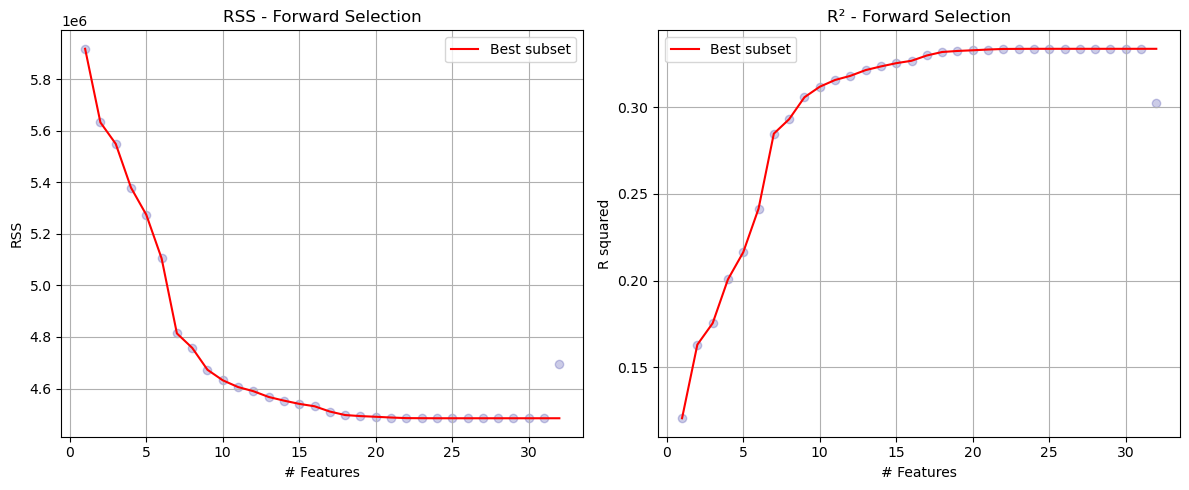

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(df_for['numb_features'], df_for['RSS'], alpha=0.2, color='darkblue')
ax[0].plot(df_for['numb_features'], df_for['min_RSS'], color='red', label='Best subset')
ax[0].set_title('RSS - Forward Selection')
ax[0].set_xlabel('# Features');ax[0].set_ylabel('RSS')
ax[0].legend()
ax[0].grid(True)

ax[1].scatter(df_for['numb_features'], df_for['R_squared'], alpha=0.2, color='darkblue')
ax[1].plot(df_for['numb_features'], df_for['max_R_squared'], color='red', label='Best subset')
ax[1].set_title('R² - Forward Selection')
ax[1].set_xlabel('# Features');ax[1].set_ylabel('R squared')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

Algoritmo Backward Stepwise Selection

1. Sea $M_p$ el modelo completo, que contiene todos los predictores.

2. Para $k = p, p-1, \dots, 1$:

    2.1. Considerar todos los modelos que contienen todos los predictores en $M_k$ excepto uno, para un total de $k-1$ predictores.
    2.2. Seleccionar el mejor entre los $k$ modelos, y llamarlo $M_{k-1}$.Aca el mejor es definido como el que tiene el menor $RSS$ o equivalentemente el $R^2$ mas grande.
3. Selecciona el mejor modelo entre $M_0, \dots, M_p$ usando el error de la predicción o del set de validación, $C_p$ ,$(AIC)$, $BIC$ o el $R^{2}_{ajusted}$ o Usando $CV$.

Teniendo una cantidad de  combinaciones:

$$
\sum_{k=1}^{n-1} k = \sum_{k=1}^{31} k = \frac{31 \cdot 32}{2} = 496 \text{ combinaciones}
$$

In [59]:
from models import backward_selection

In [60]:
resultados_backward = backward_selection(X,Y)

In [61]:
num_var = resultados_backward['num_variables']
rss_val = resultados_backward['RSS']
r_sqr = resultados_backward['R_squared']
variables = resultados_backward['variables']
num_var = num_var[:len(rss_val)] 

In [62]:
df_back = pd.DataFrame({
    'numb_features': num_var,
    'RSS': rss_val,
    'R_squared': r_sqr
})
df_back['min_RSS'] = df_back['RSS'].cummax()
df_back['max_R_squared'] = df_back['R_squared'].cummin()


In [63]:
print(f"{'N° var':<3} | {'Variables (índices)':<95} | {'RSS':<10} | {'R²':<10}")
for i in np.argsort(rss_val)[:7]:
    n = num_var[i]
    f = variables[i]
    r = round(rss_val[i])
    r_2 = round(r_sqr[i],3)
    print(f"{n:<6} | {str(f):<40} | {r:<10} | {r_2:<10}")

N° var | Variables (índices)                                                                             | RSS        | R²        
29     | [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31] | 4484740    | 0.334     
30     | [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31] | 4484740    | 0.334     
28     | [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31] | 4484740    | 0.334     
27     | [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31] | 4484740    | 0.334     
26     | [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31] | 4484742    | 0.334     
25     | [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 16, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31] | 4484748    | 0.334     
24     | [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 1

In [64]:
ind = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
col = df_.columns

sel_names = [col[i] for i in ind]

for name in sel_names:
    print(name)

distancia_vegetacion
distancia_calles
distancia_universidad
distancia_comercio
distancia_bencineras
distancia_zonas_recrea
distancia_hospitales
distancia_oficinas
distancia_escuelas
distancia_metro
distancia_muni
distancia_parking
vegetation
roads
universities
commerce
gas_stations
recreational_area
offices
porcion_h
porcion_edad_15_64
porcion_edad_65
porcion_inmigrantes
k5cls_1
k5cls_2
k5cls_3
k5cls_4
k5cls_5
k5cls_6


In [65]:
df_back

,numb_features,RSS,R_squared,min_RSS,max_R_squared
0,31,4.484984e+06,0.333606,4.484984e+06,0.333606
1,30,4.484740e+06,0.333643,4.484984e+06,0.333606
2,29,4.484740e+06,0.333643,4.484984e+06,0.333606
3,28,4.484740e+06,0.333643,4.484984e+06,0.333606
4,27,4.484740e+06,0.333643,4.484984e+06,0.333606
5,26,4.484742e+06,0.333642,4.484984e+06,0.333606
6,25,4.484748e+06,0.333641,4.484984e+06,0.333606
7,24,4.484758e+06,0.333640,4.484984e+06,0.333606
8,23,4.484984e+06,0.333606,4.484984e+06,0.333606
9,22,4.485274e+06,0.333563,4.485274e+06,0.333563


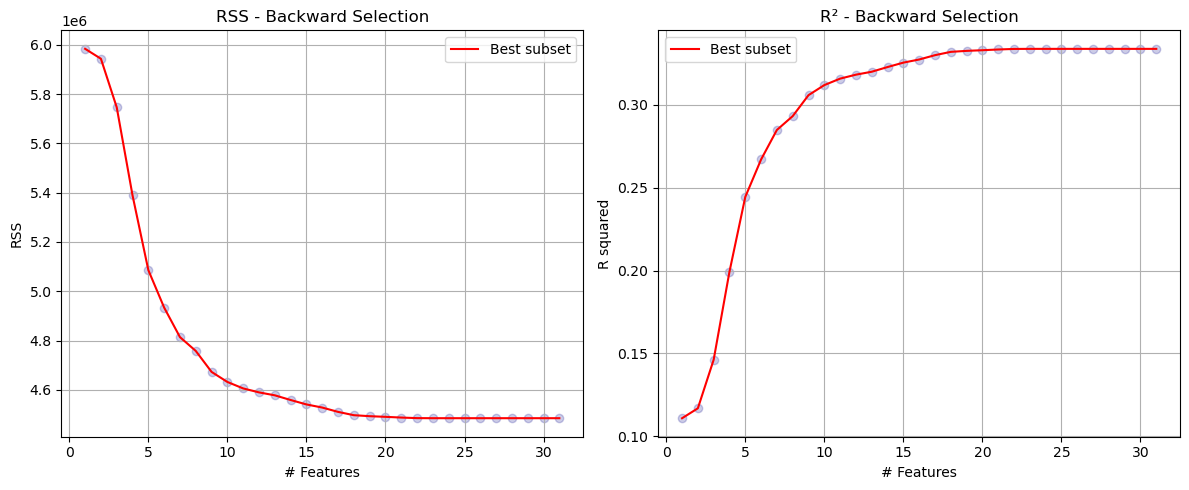

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(df_back['numb_features'], df_back['RSS'], alpha=0.2, color='darkblue')
ax[0].plot(df_back['numb_features'], df_back['min_RSS'], color='red', label='Best subset')
ax[0].set_title('RSS - Backward Selection')
ax[0].set_xlabel('# Features');ax[0].set_ylabel('RSS')
ax[0].legend()
ax[0].grid(True)

ax[1].scatter(df_back['numb_features'], df_back['R_squared'], alpha=0.2, color='darkblue')
ax[1].plot(df_back['numb_features'], df_back['max_R_squared'], color='red', label='Best subset')
ax[1].set_title('R² - Backward Selection')
ax[1].set_xlabel('# Features');ax[1].set_ylabel('R squared')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

<h2>Ridge</h2>


Recordndo RSS:

$$
RSS = \sum_{i=1}^n(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij})^2
$$

$$
\sum_{i=1}^n(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij})^2 + \lambda\sum_{j=1}^p\beta_{j}^2 = RSS +  \lambda\sum_{j=1}^p\beta_{j}^2
$$

Donde $\lambda \geq 0 $ es un parametro de tuning, a ser determinado de fuera del modelo. este segundo termino actua como una penalidad al modelo cuando este es mas cercano a $\lambda = 0$ no genera un impacto y nos quedamos con el modelo normal indicandonos que no hay un sesgo. a medida que $\lambda \rightarrow \infty
$ el modelo castica mas a los coeficientes grandes, forzandolos a ser cercanos a 0, apoyandonos en reducir la variabilidad del modelo (overfitting).

Otra forma de formulaarlo:

$$
\min_{\beta} \left\{ \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 \right\}
\quad \text{subject to} \quad \sum_{j=1}^{p} \beta_j^2 \leq s
$$

<p>Usaremos Sckitlearn</p>

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=77)
lambdas = np.linspace(0.1, 50, 100)

In [71]:
lambdas.shape

(100,)

In [83]:
mse_list = []
r2_list = []

In [84]:
for lm in lambdas[:20]:
     model = make_pipeline(
         StandardScaler(),
        ElasticNet(alpha=lm,l1_ratio=0.0,max_iter=10000)
     )

     model.fit(X_train,y_train)
     y_pred = model.predict(X_test)

     mse = rss(y_test, y_pred) / len(y_test)
     r2 = r_squared(y_test, y_pred)

     mse_list.append(mse)
     r2_list.append(r2)

c:\Users\Diego\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.906e+06, tolerance: 5.368e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Diego\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.174e+06, tolerance: 5.368e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

In [87]:
mse_list = np.array(mse_list)
r2_list = np.array(r2_list)
min_idx = np.argmin(mse_list)

In [88]:
mse_list.shape

(20,)

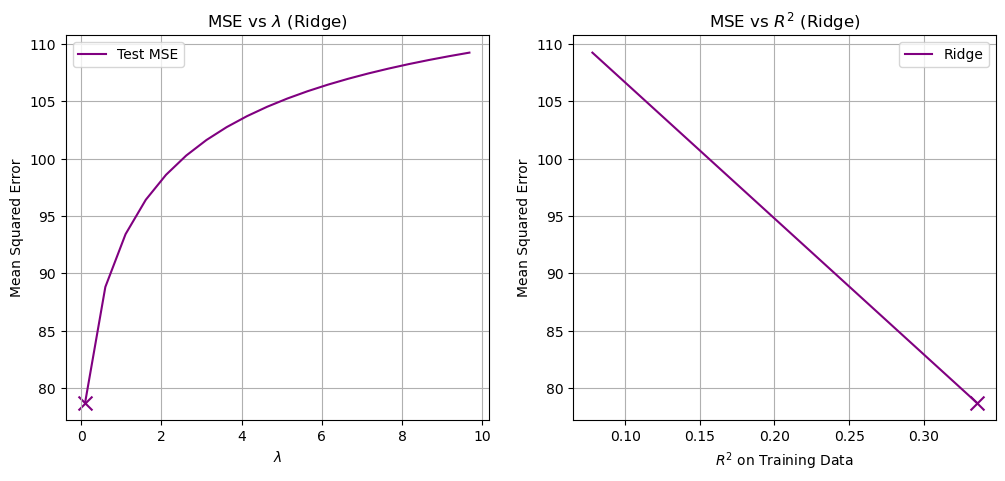

In [93]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(lambdas[:20], mse_list, color='purple', label='Test MSE')
ax[0].scatter(lambdas[:20][min_idx], mse_list[min_idx], color='purple', marker='x', s=100)
ax[0].set_title('MSE vs $\lambda$ (Ridge)')
ax[0].set_xlabel(r'$\lambda$');ax[0].set_ylabel('Mean Squared Error')  
ax[0].grid(True)
ax[0].legend()

sorted_idx = np.argsort(r2_list)
ax[1].plot(r2_list[sorted_idx], mse_list[sorted_idx], color='purple', label='Ridge')
ax[1].scatter(r2_list[min_idx], mse_list[min_idx], color='purple', marker='x', s=100)
ax[1].set_title('MSE vs $R^2$ (Ridge)')
ax[1].set_xlabel(r'$R^2$ on Training Data');ax[1].set_ylabel('Mean Squared Error')
ax[1].grid(True)
ax[1].legend()

In [95]:
model = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=lambdas, store_cv_values=True) 
)

In [96]:
model.fit(X_train, y_train)
ridge_cv = model.named_steps['ridgecv']
y_pred = model.predict(X_test)
print(f"Lambda óptimo (alpha): {ridge_cv.alpha_}")

Lambda óptimo (alpha): 0.1


<p>Nos quedamos sin penalización</p>

<h2>Lasso</h2>

La ecuación para Lasso sigue el siguiente problema:
$$
\min_{\beta} \left\{ \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 \right\}
\quad \text{subject to} \quad \sum_{j=1}^{p} |\beta_j| \leq s
$$

Al igual que Ridge busca minimizar los residuales usando una penalizacion sobre el rss, s es un parametro para controlar el conjunto de soluciones, a más pequeño mas cercanos a 0's seran los coeficientes.

Escrito con $\lambda$:

$$
RSS + \lambda \sum_{j=1}^{p} |\beta_j| = \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

Si lambda tiende a infinito va a penalizar mas fuerte a los coeficientes forzandolos a ser 0!, por lo que como sabemos con los test de significancia coeficientes igual a 0 los podemos eliminar.



In [97]:
mse_list = []
r2_list = []

In [ ]:
for lm in lambdas[:20]:
    model = make_pipeline(
        StandardScaler(),
        ElasticNet(alpha=lm, l1_ratio=1.0, max_iter=10000) 
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = rss(y_test, y_pred) / len(y_test)
    r2 = r_squared(y_test, y_pred)

    mse_list.append(mse)
    r2_list.append(r2)

In [99]:
mse_array = np.array(mse_list)
r2_array = np.array(r2_list)
min_idx = np.argmin(mse_array)

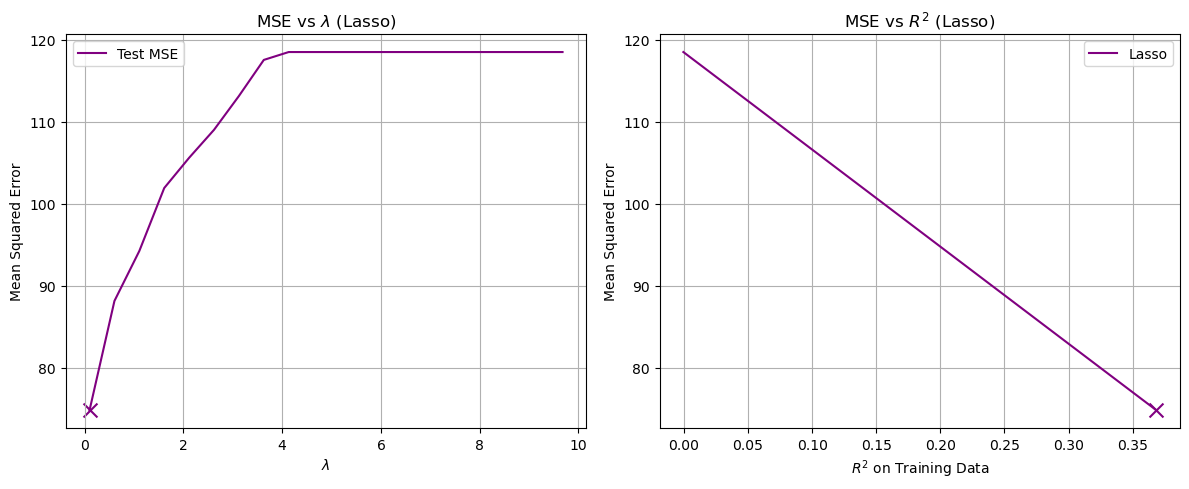

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(lambdas[:20], mse_array, color='purple', label='Test MSE')
ax[0].scatter(lambdas[min_idx], mse_array[min_idx], color='purple', marker='x', s=100)
ax[0].set_title('MSE vs $\lambda$ (Lasso)')
ax[0].set_xlabel(r'$\lambda$');ax[0].set_ylabel('Mean Squared Error')
ax[0].grid(True)
ax[0].legend()

sorted_idx = np.argsort(r2_array)
ax[1].plot(r2_array[sorted_idx], mse_array[sorted_idx], color='purple', label='Lasso')
ax[1].scatter(r2_array[min_idx], mse_array[min_idx], color='purple', marker='x', s=100)
ax[1].set_title('MSE vs $R^2$ (Lasso)')
ax[1].set_xlabel(r'$R^2$ on Training Data');ax[1].set_ylabel('Mean Squared Error')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

In [103]:
model = make_pipeline(
    StandardScaler(),
    LassoCV(alphas=lambdas, cv=5, max_iter=10000)
)

In [104]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
lasso_cv = model.named_steps['lassocv']

In [105]:
print(f"Lambda óptimo (alpha): {lasso_cv.alpha_:.4f}")

Lambda óptimo (alpha): 0.1000


In [108]:
coef = lasso_cv.coef_ 

In [111]:
coef

array([ 0.36294746,  8.56920427,  1.12726168,  0.49827369,  1.86136401,
       -3.87051237,  2.41424194, -1.44305296, -3.93409713, -0.        ,
       -0.        ,  1.21239848,  0.        ,  0.0510732 , -0.0521986 ,
       -0.        , -0.        , -0.        ,  0.06348185, -0.04094714,
       -0.        ,  6.21771845, -0.373813  ,  0.33415606,  1.5975986 ,
       -0.18186784, -0.        ,  0.        , -0.        ,  0.15235149,
       -0.56657942,  0.10907029])

In [117]:
for name, value in zip(col, coef):
    if abs(value) == 0:
        print(f"{name} eliminado")


distancia_metro eliminado
distancia_muni eliminado
vegetation eliminado
commerce eliminado
gas_stations eliminado
recreational_area eliminado
x eliminado
k5cls_1 eliminado
k5cls_2 eliminado
k5cls_3 eliminado


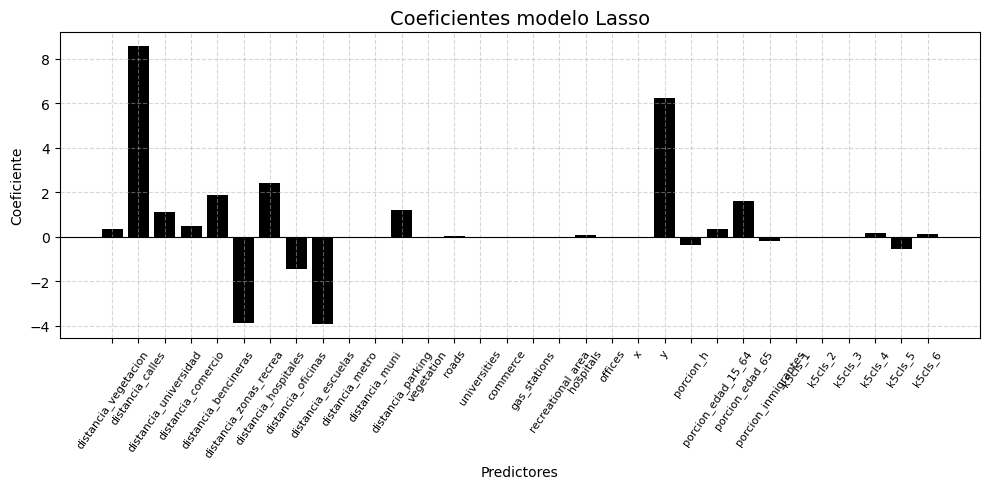

In [116]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(col, coef,color = 'black')
ax.set_title('Coeficientes modelo Lasso', fontsize=14)
ax.set_ylabel('Coeficiente');ax.set_xlabel('Predictores')
ax.tick_params(axis='x', labelrotation=55, labelsize=8)
ax.axhline(0, color='black', linewidth=0.8)  
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()